In [61]:
# 필요한 모듈 불러오기
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import glob

# 필요한 모듈 가져오기
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
plt.rcParams['figure.figsize'] = 10, 10
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

# 연구목표
- 1차 처리된 이미지를 재처리 해서 완전한 데이터셋으로 준비하기

# 데이터 탐색

In [181]:
# 이미지 불러오기
# path = './data/normal_data/normal_processed_data/*.jpg'
path = 'C:\\Users\\bcduc\\Desktop\\workplace\\gram_opencv\\data\\normal_data\\normal_processed_data\\*.jpg'
img_name_list = glob.glob(path)
# len(img_name_list)
img_list = list()
for img in img_name_list:
    image = np.array(Image.open(img))
    img_list.append(image)

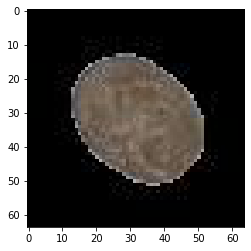

In [182]:
# 이미지 확인
plt.imshow(img_list[10])

# 데이터처리 아이디어
- 1. 이미지 컨투어를 획득한다

In [183]:
src = img_list[10]
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_OTSU)

# binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

binary = cv2.bitwise_not(binary)

# # binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)을 의미 => 윤곽선, 계층 구조를 반환
# 윤곽선 : Numpy array => 윤곽선의 좌표
# 계층 구조 : 윤곽선에 해당하는 속성 정보
_, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    # cv2.drawContours()을 이용하여 검출된 윤곽선을 그린다
    # cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)
    # 윤곽선 : Numpy array
    # 윤곽선 인덱스 : 윤곽선 배열에서 몇 번째 인덱스의 윤곽선을 그릴지를 의미
    cv2.drawContours(src, [contours[i]], 0, (0,0,255), 2)
    cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, print(i, hierachy[0][i]))
    cv2.imshow('src', src)
    cv2.waitKey(0)


cv2.destroyAllWindows()

0 [-1 -1  1 -1]
1 [-1 -1 -1  0]


In [184]:
# 이미지 컨투어가 2개가 아닌 이미지들 => 노이즈 신호들이 잡힌 이미지
cnt_contours = list()
for i in range(len(img_list)):
    src = img_list[i]
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_OTSU)
    binary = cv2.bitwise_not(binary)
    _, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    if len(contours) != 2:
        cnt_contours.append(src)

In [185]:
# 노이즈 신호가 잡힌 이미지 개수 
len(cnt_contours)

792

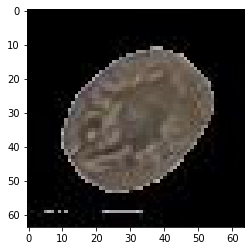

In [199]:
plt.imshow(cnt_contours[0])

In [204]:
src = cnt_contours[0]
gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(gray, 180, 255, cv2.THRESH_OTSU)

# binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

binary = cv2.bitwise_not(binary)

# # binary 이미지 확인
# cv2.imshow('binary', binary)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# cv2.findContours()를 이용하여 이진화 이미지에서 윤곽선(컨투어)를 검색
# cv2.findContours(이진화 이미지, 검색 방법, 근사화 방법)을 의미 => 윤곽선, 계층 구조를 반환
# 윤곽선 : Numpy array => 윤곽선의 좌표
# 계층 구조 : 윤곽선에 해당하는 속성 정보
_, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# for i in range(len(contours)):
#     # cv2.drawContours()을 이용하여 검출된 윤곽선을 그린다
#     # cv2.drawContours(이미지, [윤곽선], 윤곽선 인덱스, (B, G, R), 두께, 선형 타입)
#     # 윤곽선 : Numpy array
#     # 윤곽선 인덱스 : 윤곽선 배열에서 몇 번째 인덱스의 윤곽선을 그릴지를 의미
#     cv2.drawContours(src, [contours[i]], 0, (0,0,255), 2)
#     cv2.putText(src, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, print(i, hierachy[0][i]))
#     cv2.imshow('src', src)
#     cv2.waitKey(0)


# cv2.destroyAllWindows()

In [205]:
# plt.imshow(src)

[[24 41]]
[[21 59]]
[[22 58]]
[[23 58]]
[[24 58]]
[[25 58]]
[[26 58]]
[[27 58]]
[[28 58]]
[[29 58]]
[[30 58]]
[[31 58]]
[[32 58]]
[[33 58]]
[[34 59]]
[[33 60]]
[[32 60]]
[[31 60]]
[[30 60]]
[[29 60]]
[[28 60]]
[[27 60]]
[[26 60]]
[[25 60]]
[[24 60]]
[[23 60]]
[[22 60]]
[[10 59]]
[[11 58]]
[[12 59]]
[[11 60]]
[[ 8 59]]
[[ 9 58]]
[[10 59]]
[[ 9 60]]
[[ 4 59]]
[[ 5 58]]
[[ 6 58]]
[[ 7 58]]
[[ 8 59]]
[[ 7 60]]
[[ 6 60]]
[[ 5 60]]
[[35 11]]
[[36 10]]
[[37 10]]
[[38 10]]
[[39 10]]
[[40 11]]
[[41 11]]
[[42 11]]
[[43 12]]
[[44 12]]
[[45 12]]
[[46 13]]
[[47 14]]
[[48 15]]
[[49 16]]
[[50 17]]
[[51 18]]
[[52 19]]
[[53 20]]
[[54 21]]
[[54 22]]
[[54 23]]
[[55 24]]
[[55 25]]
[[55 26]]
[[55 27]]
[[55 28]]
[[55 29]]
[[55 30]]
[[54 31]]
[[54 32]]
[[53 33]]
[[53 34]]
[[52 35]]
[[52 36]]
[[51 37]]
[[50 38]]
[[50 39]]
[[49 40]]
[[48 41]]
[[47 42]]
[[46 43]]
[[46 44]]
[[45 45]]
[[44 46]]
[[43 47]]
[[42 48]]
[[41 48]]
[[40 49]]
[[39 50]]
[[38 51]]
[[37 51]]
[[36 51]]
[[35 52]]
[[34 52]]
[[33 53]]
[[32 53]]


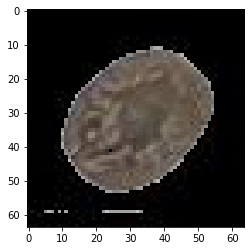

In [206]:
# 계층 구조
# [다음 윤곽선, 이전 윤곽선, 내곽 윤곽선, 외곽 윤곽선]
# 내곽 윤곽선이 없다 => 어떤 의미 ??
for idx, val in enumerate(hierachy[0]):
    if val[2] == -1:
        # print(contours[idx])
        for point in contours[idx]:
            print(point)
            # print(point[0][1],point[0][0])
            src[point[0][1],point[0][0],:] = 0
plt.imshow(src)

In [207]:
# 획득한 컨투어 값을 처리
hierachy

array([[[ 1, -1, -1, -1],
        [-1,  0,  2, -1],
        [ 3, -1, -1,  1],
        [ 4,  2, -1,  1],
        [ 5,  3, -1,  1],
        [ 6,  4, -1,  1],
        [-1,  5, -1,  1]]], dtype=int32)